In [1]:
# Dependencies
import json
import requests
import os
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from oc_key import oc_key
from oc_key import g_key

gmaps.configure(api_key=g_key) 



In [2]:
# Load city list csv
city_list_toload = "../Resources/weather_city_final.csv"

city_list_df = pd.read_csv(city_list_toload)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,64.00
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,63.00,60.80
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,64.99,60.80
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.20,61.00
4,"Albuquerque, New Mexico",Albuquerque,559202.0,35.084386,-106.650422,68.00,63.00
5,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.40,60.01
6,"Oklahoma City, Oklahoma",Oklahoma City,637284.0,35.467560,-97.516428,69.80,64.00
7,"Tulsa, Oklahoma",Tulsa,402223.0,36.153982,-95.992775,69.80,66.00
8,"Portland, Oregon",Portland,639387.0,45.505106,-122.675026,66.20,63.00
9,"Plano, Texas",Plano,284579.0,33.019843,-96.698886,68.00,63.00


In [3]:
lats = city_list_df["Lat"].tolist()
longs = city_list_df["Lng"].tolist()
lats, longs
latlongpair = zip(lats,longs)
#latlongpair

In [4]:
print(latlongpair)



In [5]:
# list to capture station count per city
station_count = []

# Loop through each city and get a count of how many electric charge stations within 50 miles of center lat/long
for latlongpair in latlongpair:
    query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=3000&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latlongpair[0]}&longitude={latlongpair[1]}&key={oc_key}"
    charge_data = requests.get(query_url)
    charge_json = charge_data.json()
    station_count.append(len(charge_json))


In [6]:
station_count

[363,
 45,
 52,
 117,
 41,
 134,
 103,
 86,
 486,
 612,
 6,
 148,
 615,
 47,
 367,
 25,
 599,
 384,
 619,
 123,
 841,
 2890,
 55,
 690,
 700,
 2966,
 217,
 1941,
 546,
 570,
 2760,
 1753,
 614,
 2840,
 474,
 455,
 376,
 143,
 569,
 67,
 270]

In [7]:
# Add station count to the data frame and kick out a CSV
city_list_df["Number of Stations"] = station_count
#city_list_df.to_csv('Results/station_count_by_city.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,64.00,363
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,63.00,60.80,45
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,64.99,60.80,52
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.20,61.00,117
4,"Albuquerque, New Mexico",Albuquerque,559202.0,35.084386,-106.650422,68.00,63.00,41
5,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.40,60.01,134
6,"Oklahoma City, Oklahoma",Oklahoma City,637284.0,35.467560,-97.516428,69.80,64.00,103
7,"Tulsa, Oklahoma",Tulsa,402223.0,36.153982,-95.992775,69.80,66.00,86
8,"Portland, Oregon",Portland,639387.0,45.505106,-122.675026,66.20,63.00,486
9,"Plano, Texas",Plano,284579.0,33.019843,-96.698886,68.00,63.00,612


In [8]:
# Get stations per 1k pop data
pop1k = city_list_df["Population"]/1000

city_list_df["Stations per 1k Population"] = pop1k/station_count
#city_list_df.to_csv('Results/station_count_per1kpop.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,64.00,363,1.326218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,63.00,60.80,45,10.335822
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,64.99,60.80,52,5.400942
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.20,61.00,117,2.660453
4,"Albuquerque, New Mexico",Albuquerque,559202.0,35.084386,-106.650422,68.00,63.00,41,13.639073
5,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.40,60.01,134,2.891030
6,"Oklahoma City, Oklahoma",Oklahoma City,637284.0,35.467560,-97.516428,69.80,64.00,103,6.187223
7,"Tulsa, Oklahoma",Tulsa,402223.0,36.153982,-95.992775,69.80,66.00,86,4.677012
8,"Portland, Oregon",Portland,639387.0,45.505106,-122.675026,66.20,63.00,486,1.315611
9,"Plano, Texas",Plano,284579.0,33.019843,-96.698886,68.00,63.00,612,0.464998


In [9]:
# Get stations per mile using area of 50-mile radius circle, 7,854 miles
permile = city_list_df["Number of Stations"]

city_list_df["Stations per mile"] = (city_list_df["Number of Stations"])/7854
#city_list_df.to_csv('Results/station_count_permile.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,64.00,363,1.326218,0.046218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,63.00,60.80,45,10.335822,0.005730
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,64.99,60.80,52,5.400942,0.006621
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.20,61.00,117,2.660453,0.014897
4,"Albuquerque, New Mexico",Albuquerque,559202.0,35.084386,-106.650422,68.00,63.00,41,13.639073,0.005220
5,"Cleveland, Ohio",Cleveland,387398.0,41.499320,-81.694361,64.40,60.01,134,2.891030,0.017061
6,"Oklahoma City, Oklahoma",Oklahoma City,637284.0,35.467560,-97.516428,69.80,64.00,103,6.187223,0.013114
7,"Tulsa, Oklahoma",Tulsa,402223.0,36.153982,-95.992775,69.80,66.00,86,4.677012,0.010950
8,"Portland, Oregon",Portland,639387.0,45.505106,-122.675026,66.20,63.00,486,1.315611,0.061879
9,"Plano, Texas",Plano,284579.0,33.019843,-96.698886,68.00,63.00,612,0.464998,0.077922


In [10]:
city_list_df = city_list_df.sort_values("Number of Stations", ascending=False)
city_list_df.to_csv('Results/citylist_sorted_stationct.csv', index=False)
city_list_df.head(20)

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
25,"Anaheim, California",Anaheim,349668.0,33.836593,-117.914301,79.00,71.01,2966,0.117892,0.377642
21,"Long Beach, California",Long Beach,468883.0,33.770050,-118.193740,75.00,69.01,2890,0.162243,0.367965
33,"Santa Ana, California",Santa Ana,333499.0,33.745472,-117.867653,79.00,71.01,2840,0.117429,0.361599
30,"Irvine, California",Irvine,265502.0,33.684567,-117.826505,75.99,70.00,2760,0.096196,0.351413
27,"Oakland, California",Oakland,421042.0,37.804351,-122.271164,64.40,60.01,1941,0.216920,0.247135
31,"San Jose, California",San Jose,1026658.0,37.338208,-121.886329,73.40,68.00,1753,0.585658,0.223198
20,"Stockton, California",Stockton,306283.0,37.957702,-121.290780,78.80,73.00,841,0.364189,0.107079
24,"San Diego, California",San Diego,1401932.0,32.715738,-117.161084,78.01,68.00,700,2.002760,0.089127
23,"Chula Vista, California",Chula Vista,266468.0,32.640054,-117.084196,77.00,71.01,690,0.386186,0.087853
18,"Arlington, Texas",Arlington,392462.0,32.735687,-97.108066,69.01,66.00,619,0.634026,0.078813


In [11]:
# Set up a heat map for charging stations
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationspermile = city_list_df["Stations per mile"].astype(float)

In [12]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationct, dissipating=False, max_intensity=750, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Set up a heat map for charging stations per 1k pop
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationper1k = city_list_df["Stations per 1k Population"].astype(float)

In [14]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationspermile, dissipating=False, max_intensity=.30, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
stations = city_list_df["Number of Stations"].tolist()
latitudes = city_list_df["Lat"].tolist()
population = city_list_df["Population"].tolist()
stations_mile = city_list_df["Stations per mile"].tolist()
maxtemp = city_list_df["Max Temp"].tolist()

#Doesn't show much
#plt.scatter(stations, population)
#plt.grid(True)
#plt.show()

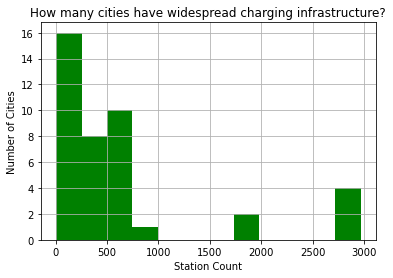

In [16]:
plt.hist(stations, bins=12, color='green')
plt.ylabel("Number of Cities")
plt.xlabel("Station Count")
plt.title("How many cities have widespread charging infrastructure?")
plt.grid(True)
plt.savefig("Results/station_ct_by_cities.png")
plt.show()


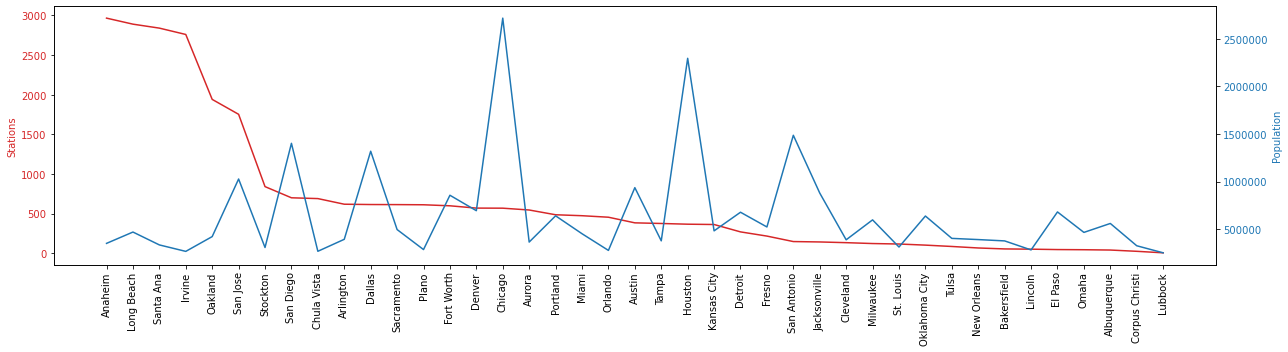

In [17]:
# Generate a figure comparing station count to population
fig, ax1 = plt.subplots(figsize=(18,5))

color = 'tab:red'
#ax1.set_xlabel("City")
ax1.set_ylabel("Stations", color=color)
ax1.plot(city_list_df["Clean_City"], stations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(city_list_df["Clean_City"], population, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', style='plain')

fig.tight_layout()
plt.savefig("Results/stations_v_population.png")
plt.show()

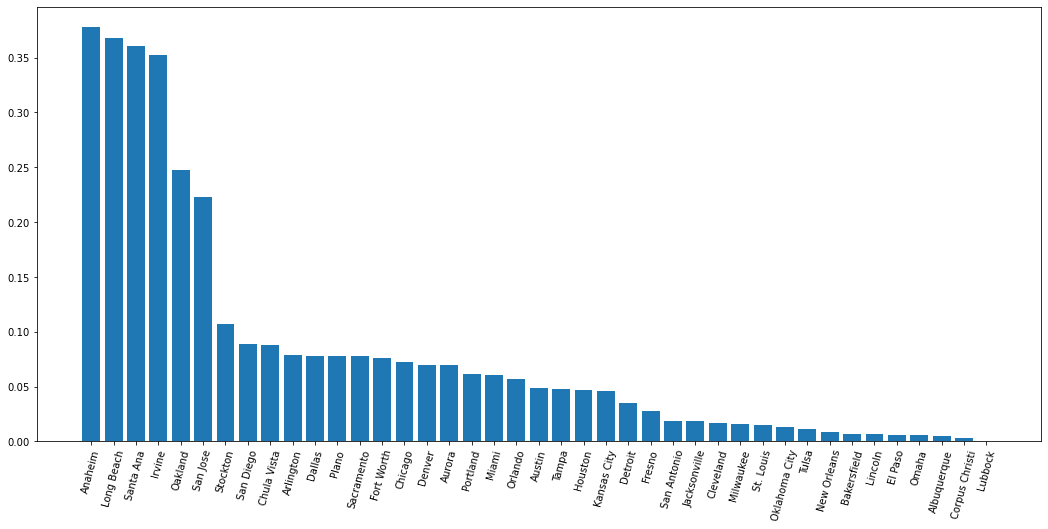

In [38]:
# Stations per mile graphic
plt.figure(figsize=(18,8))
plt.bar(city_list_df["Clean_City"], city_list_df["Stations per mile"])
plt.xticks(rotation=75)
plt.savefig("Results/stations_per_mile.png")
plt.show()

In [39]:
station_corr = city_list_df.corr()
station_corr.unstack().sort_values()

Number of Stations          Lng                          -0.543813
Lng                         Number of Stations           -0.543813
Stations per mile           Lng                          -0.543813
Lng                         Stations per mile            -0.543813
Max Temp                    Lat                          -0.541490
                                                            ...   
Lat                         Lat                           1.000000
Stations per 1k Population  Stations per 1k Population    1.000000
Stations per mile           Stations per mile             1.000000
Number of Stations          Stations per mile             1.000000
Stations per mile           Number of Stations            1.000000
Length: 64, dtype: float64